In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash_bootstrap_components as dbc
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DataPreProcessing/PreProcessedData/cleaned_data.csv")
df

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag,title,genres,imdbId,tmdbId,...,Film Noir,Horror,Imax,Musical,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,1,4.0,2000-07-30 18:45:03,NaN,NaN,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",114709,862.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,2000-07-30 18:20:47,NaN,NaN,Grumpier Old Men (1995),"['Comedy', 'Romance']",113228,15602.0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,2000-07-30 18:37:04,NaN,NaN,Heat (1995),"['Action', 'Crime', 'Thriller']",113277,949.0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,2000-07-30 19:03:35,NaN,NaN,Seven (a.k.a. Se7en) (1995),"['Mystery', 'Thriller']",114369,807.0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,2000-07-30 18:48:51,NaN,NaN,"Usual Suspects, The (1995)","['Crime', 'Mystery', 'Thriller']",114814,629.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100950,610,166534,4.0,2017-05-03 21:53:22,NaN,NaN,Split (2017),"['Drama', 'Horror', 'Thriller']",4972582,381288.0,...,0,1,0,0,0,0,0,1,0,0
100951,610,168248,5.0,2017-05-03 22:21:31,Heroic Bloodshed,2017-05-03 20:44:30,John Wick: Chapter Two (2017),"['Action', 'Crime', 'Thriller']",4425200,324552.0,...,0,0,0,0,0,0,0,1,0,0
100952,610,168250,5.0,2017-05-08 19:50:47,NaN,NaN,Get Out (2017),['Horror'],5052448,419430.0,...,0,1,0,0,0,0,0,0,0,0
100953,610,168252,5.0,2017-05-03 21:19:12,NaN,NaN,Logan (2017),"['Action', 'Science Fiction']",3315342,263115.0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
movies_df = pd.read_csv("../DataPreProcessing/PreProcessedData/movie_level_data.csv")
movies_df

,movieId,title,genres,imdbId,tmdbId,year,average_rating,rating_count,Action,Adventure,...,Film Noir,Horror,Imax,Musical,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",114709,862.0,1995.0,3.920930,215,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,Grumpier Old Men (1995),"['Comedy', 'Romance']",113228,15602.0,1995.0,3.259615,52,0,0,...,0,0,0,0,0,1,0,0,0,0
2,6,Heat (1995),"['Action', 'Crime', 'Thriller']",113277,949.0,1995.0,3.946078,102,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,Seven (a.k.a. Se7en) (1995),"['Mystery', 'Thriller']",114369,807.0,1995.0,3.975369,203,0,0,...,0,0,0,0,1,0,0,1,0,0
4,50,"Usual Suspects, The (1995)","['Crime', 'Mystery', 'Thriller']",114814,629.0,1995.0,4.237745,204,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,160341,Bloodmoon (1997),"['Action', 'Thriller']",118745,30948.0,1997.0,2.500000,1,1,0,...,0,0,0,0,0,0,0,1,0,0
9720,160527,Sympathy for the Underdog (1971),"['Action', 'Crime', 'Drama']",66806,90351.0,1971.0,4.500000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9721,160836,Hazard (2005),"['Action', 'Drama', 'Thriller']",798722,70193.0,2005.0,3.000000,1,1,0,...,0,0,0,0,0,0,0,1,0,0
9722,163937,Blair Witch (2016),"['Horror', 'Thriller']",1540011,351211.0,2016.0,3.500000,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [4]:
movies_df['decade'] = (movies_df['year'] // 10) * 10
df_counts = movies_df.groupby('decade')['rating_count'].sum().reset_index()
df_avg = movies_df.groupby('decade')['average_rating'].mean().reset_index()

In [5]:
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Fantasy', 'Film Noir', 'Horror', 'Imax', 'Musical', 'Mystery',
    'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'
]

# --- App Setup ---
app_1 = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app_1.layout = dbc.Container([
    html.H1("Genre Ratings Analysis by Year Range", className="mt-4 mb-4 text-center"),

    # --- Year Range Slider ---
    dbc.Row([
        dbc.Col([
            html.Label("Select Year Range:", style={'fontWeight': 'bold'}),
            dcc.RangeSlider(
                id='year-slider',
                min=int(movies_df['year'].min()),
                max=int(movies_df['year'].max()),
                step=1,
                value=[int(movies_df['year'].min()), int(movies_df['year'].max())],
                marks={int(y): str(int(y)) for y in range(int(movies_df['year'].min()), int(movies_df['year'].max())+1, 10)},
                tooltip={"placement": "bottom", "always_visible": True}
            )
        ], md=12)
    ], className="mb-4"),

    # --- Genre Dropdown ---
    dbc.Row([
        dbc.Col([
            html.Label("Select Genres:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in genre_cols],
                value=genre_cols,  # select all by default
                multi=True,
                placeholder="Select genres..."
            )
        ], md=12)
    ], className="mb-4"),

    # --- Metric Toggle ---
    dbc.Row([
        dbc.Col([
            html.Label("Select Metric:", style={'fontWeight': 'bold'}),
            dcc.RadioItems(
                id='metric-toggle',
                options=[
                    {'label': 'Total Ratings', 'value': 'count'},
                    {'label': 'Weighted Average Rating', 'value': 'average'}
                ],
                value='count',
                inline=True,
                inputStyle={"margin-right": "6px", "margin-left": "12px"}
            )
        ], md=12)
    ], className="mb-4"),

    # --- Info Text ---
    dbc.Row([
        dbc.Col(html.H5(id='info-text', className="text-center mb-3"), width=12)
    ]),

    # --- Graph ---
    dbc.Row([
        dbc.Col(dcc.Graph(id='ratings-genre-bar', style={'height': '600px'}), width=12)
    ])
], fluid=True)


# --- Callback ---
@app_1.callback(
    [Output('ratings-genre-bar', 'figure'),
     Output('info-text', 'children')],
    [Input('year-slider', 'value'),
     Input('genre-dropdown', 'value'),
     Input('metric-toggle', 'value')]
)
def update_genre_plot(selected_years, selected_genres, selected_metric):
    start_year, end_year = selected_years

    if not selected_genres:
        selected_genres = genre_cols

    # --- Filter data ---
    filtered = movies_df[(movies_df['year'] >= start_year) & (movies_df['year'] <= end_year)].copy()

    # --- Metric: Total Ratings ---
    if selected_metric == 'count':
        genre_values = {
            genre: (filtered[genre] * filtered['rating_count']).sum()
            for genre in selected_genres
        }

        # Average of genre totals (for dotted line)
        avg_value = pd.Series(list(genre_values.values())).mean()

        metric_label = 'Total Ratings'
        title = f"Total Ratings by Genre ({start_year}–{end_year})"
        color_scale = 'Viridis'

    # --- Metric: Weighted Average Rating ---
    else:
        genre_values = {}
        for genre in selected_genres:
            genre_movies = filtered[filtered[genre] == 1]
            if not genre_movies.empty:
                # Weighted average = sum(rating * count) / sum(count)
                weighted_avg = (
                    (genre_movies['average_rating'] * genre_movies['rating_count']).sum()
                    / genre_movies['rating_count'].sum()
                )
                genre_values[genre] = weighted_avg
            else:
                genre_values[genre] = 0

        # Weighted average across all movies (for dotted line)
        avg_value = (
            (filtered['average_rating'] * filtered['rating_count']).sum()
            / filtered['rating_count'].sum()
        )

        metric_label = 'Weighted Average Rating'
        title = f"Weighted Average Ratings by Genre ({start_year}–{end_year})"
        color_scale = 'Viridis'

    # --- Create DataFrame ---
    df = pd.DataFrame(list(genre_values.items()), columns=['Genre', metric_label])
    df = df.sort_values(by=metric_label, ascending=False)

    # --- Bar Plot ---
    fig = px.bar(
        df,
        x='Genre',
        y=metric_label,
        text_auto='.2f',
        title=title,
        color=metric_label,
        color_continuous_scale=color_scale
    )

    # --- Add dotted average line ---
    fig.add_hline(
        y=avg_value,
        line_dash="dot",
        line_color="white",
        annotation_text=f"Avg {metric_label}: {avg_value:.2f}",
        annotation_position="top right"
    )

    # --- Style ---
    fig.update_traces(textposition='outside', marker_line_color='black', marker_line_width=0.8)
    if selected_metric == 'average':
        fig.update_yaxes(range=[2.5, 4.5])
    fig.update_layout(
        template='plotly_dark',
        title_x=0.5,
        margin=dict(l=50, r=50, t=80, b=50),
        coloraxis_showscale=False,
        xaxis={'categoryorder': 'total descending'}
    )

    info_text = (
        f"Showing {metric_label.lower()} for selected genres "
        f"between {start_year} and {end_year}."
    )

    return fig, info_text


# Run inside Jupyter Notebook
app_1.run(mode="inline", port=8081, debug=True)


In [6]:
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Fantasy', 'Film Noir', 'Horror', 'Imax', 'Musical', 'Mystery',
    'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'
]

# --- Compute "Overall" average rating per year ---
yearly_overall = movies_df.groupby('year')['average_rating'].mean().reset_index()
yearly_overall['Genre'] = 'Overall'

# --- App Setup ---
app_2 = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app_2.layout = dbc.Container([
    html.H1("Average Movie Rating by Year (Across Genres)", className="mt-4 mb-4 text-center"),

    # --- Genre Selection Dropdown ---
    dbc.Row([
        dbc.Col([
            html.Label("Select Genres:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in ['Overall'] + genre_cols],
                value=['Action', 'Comedy'],  # default
                multi=True,
                placeholder="Select genres..."
            )
        ], md=12)
    ], className="mb-4"),

    # --- Info Text ---
    dbc.Row([
        dbc.Col(html.H5(id='info-text', className="text-center mb-3"), width=12)
    ]),

    # --- Graph ---
    dbc.Row([
        dbc.Col(dcc.Graph(id='genre-lineplot', style={'height': '600px'}), width=12)
    ])
], fluid=True)


# --- Callback ---
@app_2.callback(
    [Output('genre-lineplot', 'figure'),
     Output('info-text', 'children')],
    [Input('genre-dropdown', 'value')]
)
def update_lineplot(selected_genres):
    if not selected_genres:
        selected_genres = ['Overall']

    # --- Prepare dataframe ---
    genre_dfs = []

    # Always include the overall mean
    if 'Overall' in selected_genres:
        genre_dfs.append(yearly_overall)

    # For each selected genre, compute mean per year
    for genre in selected_genres:
        if genre != 'Overall' and genre in genre_cols:
            temp = movies_df[movies_df[genre] == 1].groupby('year')['average_rating'].mean().reset_index()
            temp['Genre'] = genre
            genre_dfs.append(temp)

    # Combine all selected genres
    final_df = pd.concat(genre_dfs, ignore_index=True)

    # --- Create line chart ---
    fig = px.line(
        final_df,
        x='year',
        y='average_rating',
        color='Genre',
        markers=True,
        title="Average Movie Rating by Year (Selected Genres)",
        labels={'year': 'Release Year', 'average_rating': 'Average Rating'},
    )

    # --- Style ---
    fig.update_layout(
        template='plotly_dark',
        title_x=0.5,
        margin=dict(l=60, r=60, t=80, b=60),
        legend_title_text="Genre",
        hovermode="x unified"
    )

    fig.update_traces(line=dict(width=3), marker=dict(size=6))

    info_text = f"Showing average movie ratings by release year for selected genres: {', '.join(selected_genres)}."

    return fig, info_text


# Run inside Jupyter Notebook
app_2.run(mode="inline", port=8079, debug=True)


### Number of movies Vs genre

In [7]:
genres = [
        'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film Noir', 'Horror', 'Imax', 'Musical', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'
]

decades = list(range(1900, 2020, 10))

# --- App Layout ---
app_3 = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app_3.layout = dbc.Container([
    html.H1("Number of Movies by Genre (Decade Range)", className="mt-4 mb-4"),

    # RangeSlider for selecting decades
    dbc.Row([
        dbc.Col([
            html.Label("Select Decade Range:", style={'fontWeight': 'bold'}),
            dcc.RangeSlider(
                id='decade-slider',
                min=min(decades),
                max=max(decades),
                step=10,
                value=[1900, 2020],
                marks={year: f"{year}s" for year in decades},
                tooltip={"placement": "bottom", "always_visible": True}
            )
        ], md=10)
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(html.H5(id='decade-info', className="mb-3"))
    ]),

    # Graph for number of movies
    dbc.Row([
        dbc.Col(dcc.Graph(id='genre-count-graph')),
    ])
], fluid=True)


# --- Callback ---
@app_3.callback(
    [Output('genre-count-graph', 'figure'),
     Output('decade-info', 'children')],
    Input('decade-slider', 'value')
)
def update_genre_count(selected_range):
    start_decade, end_decade = selected_range
    filtered = movies_df[(movies_df['year'] >= start_decade) & (movies_df['year'] <= end_decade)]

    # Count number of movies per genre
    genre_counts = []
    for g in genres:
        genre_counts.append({'Genre': g, 'Movie Count': int(filtered[g].sum())})

    count_df = pd.DataFrame(genre_counts).sort_values('Movie Count', ascending=False)

    # Plot bar chart
    fig = px.bar(
        count_df,
        x='Genre',
        y='Movie Count',
        title=f"Number of Movies by Genre ({start_decade}s–{end_decade}s)",
        color='Movie Count',
        color_continuous_scale='Greens',
        text='Movie Count'
    )

    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(
        title_x=0.5,
        height=550,
        template='plotly_dark',
        margin=dict(l=40, r=40, t=60, b=100)
    )

    info_text = f"Showing {len(filtered)} movies released between {start_decade} and {end_decade}."
    return fig, info_text


# Run inside notebook
app_3.run(mode="inline", port=8074, debug=True)


In [8]:
# movie_stats = df.groupby('title').agg({'rating': ['mean', 'count']}).reset_index()
# movie_stats.columns = ['title', 'avg_rating', 'rating_count']
# 
# fig = px.scatter(
#     movie_stats,
#     x='rating_count',
#     y='avg_rating',
#     hover_name='title',
#     title='Average Rating vs. Number of Ratings',
#     trendline='ols',
#     color='avg_rating',
#     color_continuous_scale='Plasma'
# )
# fig.update_layout(xaxis_title='Number of Ratings', yaxis_title='Average Rating')
# fig.show()


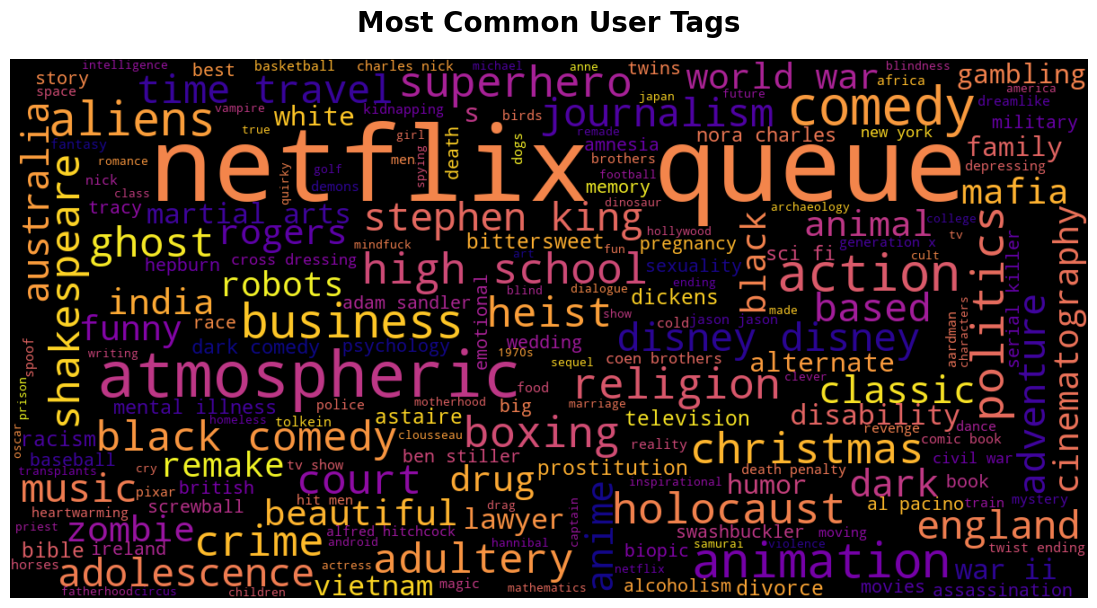

In [9]:
tags = df['tag'].dropna()

# Convert all tags to lowercase
tags = tags.astype(str).str.lower()

# Combine all tags into one string
all_tags = ' '.join(tags)

# --- Define stopwords ---
stopwords = set(STOPWORDS)
# Optionally, add your own common irrelevant words
custom_stopwords = {"movie", "film", "good", "bad", "watch", "seen"}
stopwords.update(custom_stopwords)

# --- Generate Word Cloud ---
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='black',
    stopwords=stopwords,
    colormap='plasma',
    max_words=200
).generate(all_tags)

# --- Plot ---
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common User Tags", fontsize=20, weight='bold', pad=20)
plt.show()


In [10]:
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Fantasy', 'Film Noir', 'Horror', 'Imax', 'Musical', 'Mystery',
    'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'
]

# --- Default Genres (alphabetical order) ---
default_genres = sorted(['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
                         'Crime', 'Fantasy', 'Horror', 'Science Fiction', 'Thriller'])

# --- App Setup ---
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    html.H1("Interactive Genre Correlation Heatmap", className="mt-4 mb-4 text-center"),

    # Dropdown for genre selection
    dbc.Row([
        dbc.Col([
            html.Label("Select Genres to Compare:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in sorted(genre_cols)],
                value=default_genres,  # default selection
                multi=True,
                placeholder="Select one or more genres..."
            )
        ], md=12)
    ], className="mb-4"),

    # Graph
    dbc.Row([
        dbc.Col(dcc.Graph(id='genre-heatmap', style={'height': '800px'}), width=12)
    ])
], fluid=True)


# --- Callback ---
@app.callback(
    Output('genre-heatmap', 'figure'),
    Input('genre-dropdown', 'value')
)
def update_heatmap(selected_genres):
    if not selected_genres or len(selected_genres) < 2:
        # Show message if not enough genres selected
        fig = px.imshow([[0]], text_auto=True, color_continuous_scale='RdBu')
        fig.update_layout(
            title="Select at least two genres to compute correlation",
            template='plotly_dark',
            xaxis=dict(showticklabels=False),
            yaxis=dict(showticklabels=False),
            margin=dict(l=50, r=50, t=70, b=50)
        )
        return fig

    # --- Compute correlation matrix for selected genres ---
    corr_matrix = movies_df[selected_genres].corr().round(2)

    # --- Create Heatmap ---
    fig = px.imshow(
        corr_matrix,
        x=selected_genres,
        y=selected_genres,
        color_continuous_scale='RdBu',
        zmin=-1,
        zmax=1,
        text_auto=True,
        title=f"Correlation Matrix of Selected Genres"
    )

    fig.update_layout(
        template='plotly_dark',
        title_x=0.5,
        margin=dict(l=50, r=50, t=80, b=50),
        coloraxis_colorbar=dict(title="Correlation"),
        width=900,
        height=800
    )

    return fig


# Run inside Jupyter Notebook
app.run(mode="inline", port=8084, debug=True)


In [11]:
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Fantasy', 'Film Noir', 'Horror', 'Imax', 'Musical', 'Mystery',
    'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'
]

# --- Add "Overall" option ---
all_options = ['Overall'] + sorted(genre_cols)

# --- App Setup ---
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    html.H1("Rating Distribution by Genre", className="mt-4 mb-4 text-center"),

    # Dropdown for genre selection
    dbc.Row([
        dbc.Col([
            html.Label("Select Genres:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in all_options],
                value=['Overall'],  # default
                multi=True,
                placeholder="Select one or more genres..."
            )
        ], md=12)
    ], className="mb-4"),

    # Info Text
    dbc.Row([
        dbc.Col(html.H5(id='info-text', className="text-center mb-3"), width=12)
    ]),

    # Graph
    dbc.Row([
        dbc.Col(dcc.Graph(id='rating-histogram', style={'height': '600px'}), width=12)
    ])
], fluid=True)


# --- Callback ---
@app.callback(
    [Output('rating-histogram', 'figure'),
     Output('info-text', 'children')],
    [Input('genre-dropdown', 'value')]
)
def update_histogram(selected_genres):
    # --- Handle "Overall" ---
    if not selected_genres or 'Overall' in selected_genres:
        filtered = df.copy()
        selected_label = "Overall (All Movies)"
    else:
        genre_filter = df[selected_genres].sum(axis=1) > 0
        filtered = df[genre_filter].copy()
        selected_label = ", ".join(selected_genres)

    # --- Create Histogram ---
    fig = px.histogram(
        filtered,
        x='rating',
        nbins=10,
        title=f"Rating Distribution — {selected_label}",
        color_discrete_sequence=['skyblue']
    )

    fig.update_layout(
        xaxis_title='Rating',
        yaxis_title='Frequency',
        template='plotly_dark',
        title_x=0.5,
        margin=dict(l=50, r=50, t=70, b=50)
    )

    info_text = f"Showing rating distribution for: {selected_label}."

    return fig, info_text


# Run inside Jupyter Notebook
app.run(mode="inline", port=8086, debug=True)


In [12]:
user_counts = df.groupby('userId')['rating'].count().sort_values(ascending=False).reset_index()
user_counts.columns = ['userId', 'num_ratings']

# --- Compute cumulative percentage of users and ratings ---
user_counts['cum_users'] = (user_counts.index + 1) / len(user_counts) * 100
user_counts['cum_ratings'] = user_counts['num_ratings'].cumsum() / user_counts['num_ratings'].sum() * 100

# find x position where cumulative ratings >= 80%
idx80 = user_counts[user_counts['cum_ratings'] >= 80].index.min()
if pd.notna(idx80):
    pct_users_at_80 = user_counts.loc[idx80, 'cum_users']
    cum_at_point = user_counts.loc[idx80, 'cum_ratings']
else:
    pct_users_at_80 = None
    cum_at_point = None

fig = go.Figure()

# Bars (ratings per user)
fig.add_trace(go.Bar(
    x=user_counts['cum_users'],
    y=user_counts['num_ratings'],
    name='Ratings per User',
    marker_color='skyblue',
    yaxis='y1',
    hovertemplate='Cumulative % users: %{x:.2f}%<br>Ratings: %{y}<extra></extra>'
))

# Cumulative percent line (right axis)
fig.add_trace(go.Scatter(
    x=user_counts['cum_users'],
    y=user_counts['cum_ratings'],
    name='Cumulative % of Ratings',
    yaxis='y2',
    mode='lines+markers',
    line=dict(color='orange', width=3),
    marker=dict(size=6),
    hovertemplate='Cumulative % users: %{x:.2f}%<br>Cumulative % ratings: %{y:.2f}%<extra></extra>'
))

# Vertical 20% line spanning entire plot (paper coordinates)
fig.add_shape(
    type="line",
    x0=20, x1=20,
    xref='x',
    y0=0, y1=1,
    yref='paper',
    line=dict(color="white", dash="dot")
)

# Horizontal 80% line on the right y-axis
fig.add_shape(
    type="line",
    x0=0, x1=100,
    xref='x',
    y0=80, y1=80,
    yref='y2',
    line=dict(color="white", dash="dot")
)

# Annotate the crossing point (where cum_ratings >= 80)
if pct_users_at_80 is not None:
    fig.add_trace(go.Scatter(
        x=[pct_users_at_80],
        y=[cum_at_point],
        mode='markers+text',
        textposition="top center",
        marker=dict(color="blue", size=8),
        showlegend=False,
        yaxis='y2'
    ))

fig.update_layout(
    title="Pareto Chart — Contribution of Users to Total Ratings (80/20 Rule)",
    xaxis=dict(title='Cumulative % of Users', showgrid=False),
    yaxis=dict(title='Ratings per User', side='left', showgrid=False),
    yaxis2=dict(
        title='Cumulative % of Ratings',
        overlaying='y',
        side='right',
        range=[0, 100]
    ),
    template='plotly_dark',
    title_x=0.5,
    legend=dict(x=0.7, y=0.9),
    margin=dict(l=50, r=60, t=80, b=50)
)

fig.show()


In [13]:
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Fantasy', 'Film Noir', 'Horror', 'Imax', 'Musical', 'Mystery',
    'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'
]

# --- Compute user activity ---
user_activity = df.groupby('userId')['rating'].count().reset_index()
user_activity.columns = ['userId', 'num_ratings']

# --- Merge with main df ---
merged = df.merge(user_activity, on='userId', how='left')

# --- Define activity level bins ---
merged['activity_level'] = pd.cut(
    merged['num_ratings'],
    bins=[0, 50, 200, np.inf],
    labels=['Low Activity (≤50)', 'Medium Activity (51-200)', 'High Activity (>200)']
)

# --- Dash App Setup ---
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    html.H1("Rating Distribution by User Activity Level and Genre", className="mt-4 mb-4 text-center"),

    # Genre selection dropdown
    dbc.Row([
        dbc.Col([
            html.Label("Select Genres:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in ['Overall'] + sorted(genre_cols)],
                value=['Overall'],  # Default selection
                multi=True,
                placeholder="Select one or more genres..."
            )
        ], md=12)
    ], className="mb-4"),

    # Info Text
    dbc.Row([
        dbc.Col(html.H5(id='info-text', className="text-center mb-3"), width=12)
    ]),

    # Violin Plot
    dbc.Row([
        dbc.Col(dcc.Graph(id='violin-plot', style={'height': '600px'}), width=12)
    ])
], fluid=True)


# --- Callback ---
@app.callback(
    [Output('violin-plot', 'figure'),
     Output('info-text', 'children')],
    [Input('genre-dropdown', 'value')]
)
def update_violin(selected_genres):
    # Handle selection
    if not selected_genres:
        selected_genres = ['Overall']

    dfs = []  # To store dataframes for each selected genre

    for genre in selected_genres:
        if genre == 'Overall':
            temp = merged.copy()
            temp['Genre'] = 'Overall'
        else:
            temp = merged[merged[genre] == 1].copy()
            temp['Genre'] = genre
        dfs.append(temp)

    combined = pd.concat(dfs)

    # --- Violin Plot ---
    fig = px.violin(
        combined,
        x='activity_level',
        y='rating',
        color='Genre',
        box=True,
        points='all',
        color_discrete_sequence=px.colors.qualitative.Set3,
        title="Rating Distribution by User Activity Level and Genre"
    )

    fig.update_layout(
        template='plotly_dark',
        xaxis_title='User Activity Level',
        yaxis_title='Rating',
        title_x=0.5,
        margin=dict(l=60, r=60, t=80, b=60),
        legend_title_text="Genre"
    )

    info_text = (
        f"Showing rating distribution for users across activity levels "
        f"in selected genres: {', '.join(selected_genres)}."
    )

    return fig, info_text


# Run inside Jupyter Notebook
app.run(mode="inline", port=8088, debug=True)
